In [ ]:
# -----------------------------------------------------------
# STEP 1: DATA PREPARATION
# -----------------------------------------------------------

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# -----------------------------------------------------------
# 1. Load the diabetes dataset
# -----------------------------------------------------------
diabetes = load_diabetes()

# Convert to DataFrame for easier exploration
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="disease_progression")

# -----------------------------------------------------------
# 2. Explore the structure of the dataset
# -----------------------------------------------------------
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

print("\nFirst five rows of feature data:")
display(X.head())

print("\nSummary statistics of features:")
display(X.describe())

print("\nChecking for missing values:")
print(X.isna().sum())

print("\nTarget variable statistics:")
display(y.describe())

# -----------------------------------------------------------
# 3. Data Cleaning
#    The diabetes dataset from sklearn is pre-cleaned.
#    However, we still perform checks and demonstrate how
#    cleaning would be performed if needed.
# -----------------------------------------------------------

# (A) Check for missing values
if X.isna().sum().sum() == 0:
    print("\nNo missing values found. Dataset is clean.")
else:
    # Example cleaning step if missing values were present:
    X = X.fillna(X.mean())
    print("Missing values were found and filled with feature mean values.")

# (B) Check for duplicates
duplicate_count = X.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_count)

if duplicate_count > 0:
    X = X.drop_duplicates()
    print("Duplicates removed.")



Shape of X: (442, 10)
Shape of y: (442,)

First five rows of feature data:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641



Summary statistics of features:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01



Checking for missing values:
age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

Target variable statistics:


count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: disease_progression, dtype: float64


No missing values found. Dataset is clean.

Number of duplicate rows: 0


Simple Linear Regression Results
MAE: 52.25997644534553
MSE: 4061.8259284949268
RMSE: 63.73245584860925
R²: 0.23335039815872138


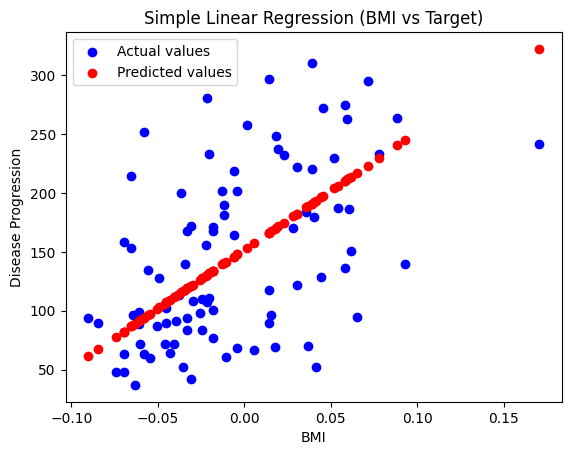

In [17]:
# -----------------------------------------------------------
# STEP 2: SIMPLE LINEAR REGRESSION (One Feature: BMI)
# -----------------------------------------------------------

# Select the BMI feature
X_bmi = X[["bmi"]]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_bmi, y, test_size=0.2, random_state=42
)

# Train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict
y_pred_lin = lin_reg.predict(X_test)

# -----------------------------------------------------------
# Evaluation Metrics
# -----------------------------------------------------------
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Simple Linear Regression Results")
print("MAE:", mae_lin)
print("MSE:", mse_lin)
print("RMSE:", rmse_lin)
print("R²:", r2_lin)

# -----------------------------------------------------------
# Visualization
# -----------------------------------------------------------
plt.scatter(X_test, y_test, color="blue", label="Actual values")
plt.scatter(X_test, y_pred_lin, color="red", label="Predicted values")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.title("Simple Linear Regression (BMI vs Target)")
plt.legend()
plt.show()



Multiple Regression Results
MAE: 42.794094679599944
MSE: 2900.1936284934814
RMSE: 53.85344583676593
R²: 0.4526027629719195


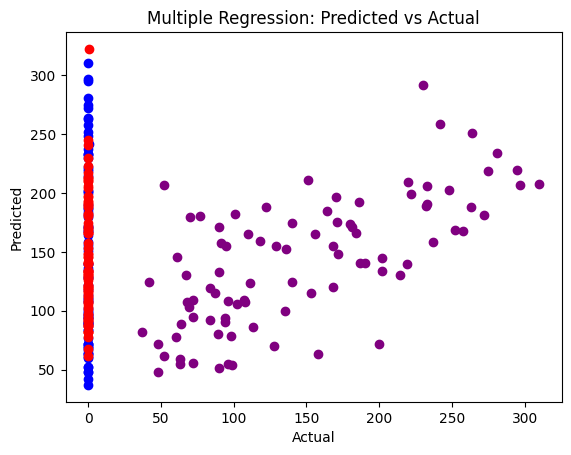

In [ ]:
# -----------------------------------------------------------
# STEP 3: MULTIPLE LINEAR REGRESSION (All Features)
# -----------------------------------------------------------

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X, y, test_size=0.2, random_state=42
)

multi_reg = LinearRegression()
multi_reg.fit(X_train_m, y_train_m)
y_pred_multi = multi_reg.predict(X_test_m)

# Metrics
mae_m = mean_absolute_error(y_test_m, y_pred_multi)
mse_m = mean_squared_error(y_test_m, y_pred_multi)
rmse_m = np.sqrt(mse_m)
r2_m = r2_score(y_test_m, y_pred_multi)

print("\nMultiple Regression Results")
print("MAE:", mae_m)
print("MSE:", mse_m)
print("RMSE:", rmse_m)
print("R²:", r2_m)

# Visualization
plt.scatter(y_test_m, y_pred_multi, color="purple")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Multiple Regression: Predicted vs Actual")
plt.show()



Ridge Regression Results
MAE: 46.138857666974516 R²: 0.41915292635986545

Lasso Regression Results
MAE: 42.831847073360876 R²: 0.4566861194580625


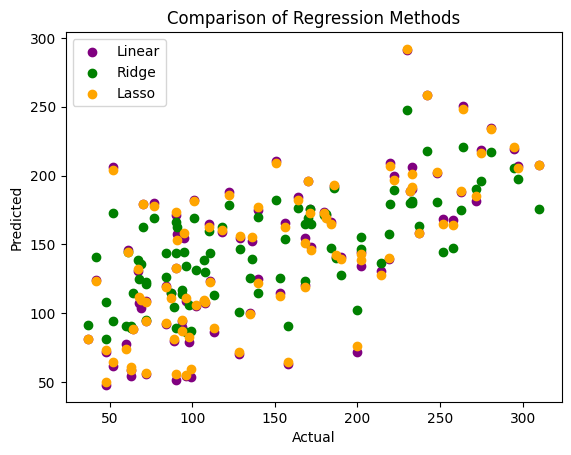

In [19]:
# -----------------------------------------------------------
# STEP 5: RIDGE & LASSO REGRESSION
# -----------------------------------------------------------

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_m, y_train_m)
y_pred_ridge = ridge.predict(X_test_m)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train_m, y_train_m)
y_pred_lasso = lasso.predict(X_test_m)

# Ridge metrics
ridge_mae = mean_absolute_error(y_test_m, y_pred_ridge)
ridge_mse = mean_squared_error(y_test_m, y_pred_ridge)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test_m, y_pred_ridge)

# Lasso metrics
lasso_mae = mean_absolute_error(y_test_m, y_pred_lasso)
lasso_mse = mean_squared_error(y_test_m, y_pred_lasso)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test_m, y_pred_lasso)

print("\nRidge Regression Results")
print("MAE:", ridge_mae, "R²:", ridge_r2)

print("\nLasso Regression Results")
print("MAE:", lasso_mae, "R²:", lasso_r2)

# Visualization
plt.scatter(y_test_m, y_pred_multi, label="Linear", color="purple")
plt.scatter(y_test_m, y_pred_ridge, label="Ridge", color="green")
plt.scatter(y_test_m, y_pred_lasso, label="Lasso", color="orange")
plt.legend()
plt.title("Comparison of Regression Methods")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


In [20]:
# -----------------------------------------------------------
# STEP 6: MODEL COMPARISON AND ANALYSIS (Dynamic Table)
# -----------------------------------------------------------

# Create a list of dictionaries where each dict is one row in the table
results = [
    {
        "Model": "Simple Linear (BMI only)",
        "MAE": mae_lin,
        "MSE": mse_lin,
        "RMSE": rmse_lin,
        "R²": r2_lin
    },
    {
        "Model": "Multiple Linear Regression",
        "MAE": mae_m,
        "MSE": mse_m,
        "RMSE": rmse_m,
        "R²": r2_m
    },
    {
        "Model": "Ridge Regression (alpha=1.0)",
        "MAE": ridge_mae,
        "MSE": ridge_mse,
        "RMSE": ridge_rmse,
        "R²": ridge_r2
    },
    {
        "Model": "Lasso Regression (alpha=0.01)",
        "MAE": lasso_mae,
        "MSE": lasso_mse,
        "RMSE": lasso_rmse,
        "R²": lasso_r2
    }
]

# Convert to DataFrame for a nice table
results_df = pd.DataFrame(results)

# Optional: round numeric columns for readability
results_df[["MAE", "MSE", "RMSE", "R²"]] = results_df[["MAE", "MSE", "RMSE", "R²"]].round(3)

print("Model Comparison Table:")
display(results_df)


Model Comparison Table:


,Model,MAE,MSE,RMSE,R²
0,Simple Linear (BMI only),52.260,4061.826,63.732,0.233
1,Multiple Linear Regression,42.794,2900.194,53.853,0.453
2,Ridge Regression (alpha=1.0),46.139,3077.416,55.474,0.419
3,Lasso Regression (alpha=0.01),42.832,2878.559,53.652,0.457
